# notes to me

- hyperparammeter tuning: https://www.youtube.com/watch?v=6Nf1x7qThR8&ab_channel=GregHogg
- was overfitting before, now its just bad

importing all the nceccessary libraries

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import plotly as pt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import BinaryCrossentropy
from keras.layers.core import Dropout
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from imblearn.over_sampling import SMOTE

In [91]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [92]:
olab_data=pd.read_csv("/Users/charan/Documents/datasets/stanford_aimi.blob/multimodalpulmonaryembolismdataset/LABS.csv")
answer_data=pd.read_csv("/Users/charan/Documents/datasets/stanford_aimi.blob/multimodalpulmonaryembolismdataset/Labels.csv")

In [93]:
olab_data.head()

,Unnamed: 0,albumin:Binary,alk:Binary,ast:Binary,anion:Binary,bilirubin:Binary,bun:Binary,bun_cre:Binary,calcium:Binary,creatinine:Binary,...,hgb:Value,inr:Value,lactate:Value,platelet:Value,potassium:Value,ptt:Value,sodium:Value,wbc:Value,idx,split
0,0,1,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.3,84,test
1,1,1,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,655.0,0.0,0.0,0.0,13.8,2248,test
2,2,1,1,1,1,1,1,0,0,1,...,0.0,1.3,0.0,356.0,0.0,15.9,0.0,6.8,2271,test
3,3,1,1,1,1,1,1,0,0,1,...,0.0,0.0,1.8,426.0,0.0,0.0,0.0,10.0,1691,test
4,4,1,1,1,1,1,1,0,0,1,...,0.0,2.0,0.0,131.0,0.0,21.7,0.0,4.0,3286,test


In [94]:
olab_data.shape

(1892, 47)

In [166]:
olab_data.describe()

,Unnamed: 0,albumin:Binary,alk:Binary,ast:Binary,anion:Binary,bilirubin:Binary,bun:Binary,bun_cre:Binary,calcium:Binary,creatinine:Binary,...,a1c:Value,hgb:Value,inr:Value,lactate:Value,platelet:Value,potassium:Value,ptt:Value,sodium:Value,wbc:Value,idx
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,...,1892.000000,1892.000000,1892.000000,1.892000e+03,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,1306.185518,0.750000,0.748943,0.749471,0.917019,0.746829,0.921776,0.114165,0.010042,0.941860,...,0.588953,0.015856,1.060772,3.171247e+12,241.947674,0.033140,11.979387,77.315011,67.523732,1581.755285
std,770.435727,0.433127,0.433736,0.433432,0.275926,0.434943,0.268595,0.318096,0.099733,0.234069,...,1.925077,0.400861,1.832387,1.379402e+14,142.132292,0.348929,13.168487,3175.786168,898.268722,1024.379050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,536.750000,0.750000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,161.000000,0.000000,0.000000,0.000000,5.900000,726.750000
50%,1466.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.100000,0.000000e+00,231.000000,0.000000,13.400000,0.000000,8.500000,1480.500000
75%,1972.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.200000,0.000000e+00,307.000000,0.000000,15.100000,0.000000,11.600000,2274.750000
max,2491.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.500000,11.700000,60.000000,6.000000e+15,1038.000000,4.200000,300.000000,138138.000000,24100.000000,3957.000000


plotting all the columns

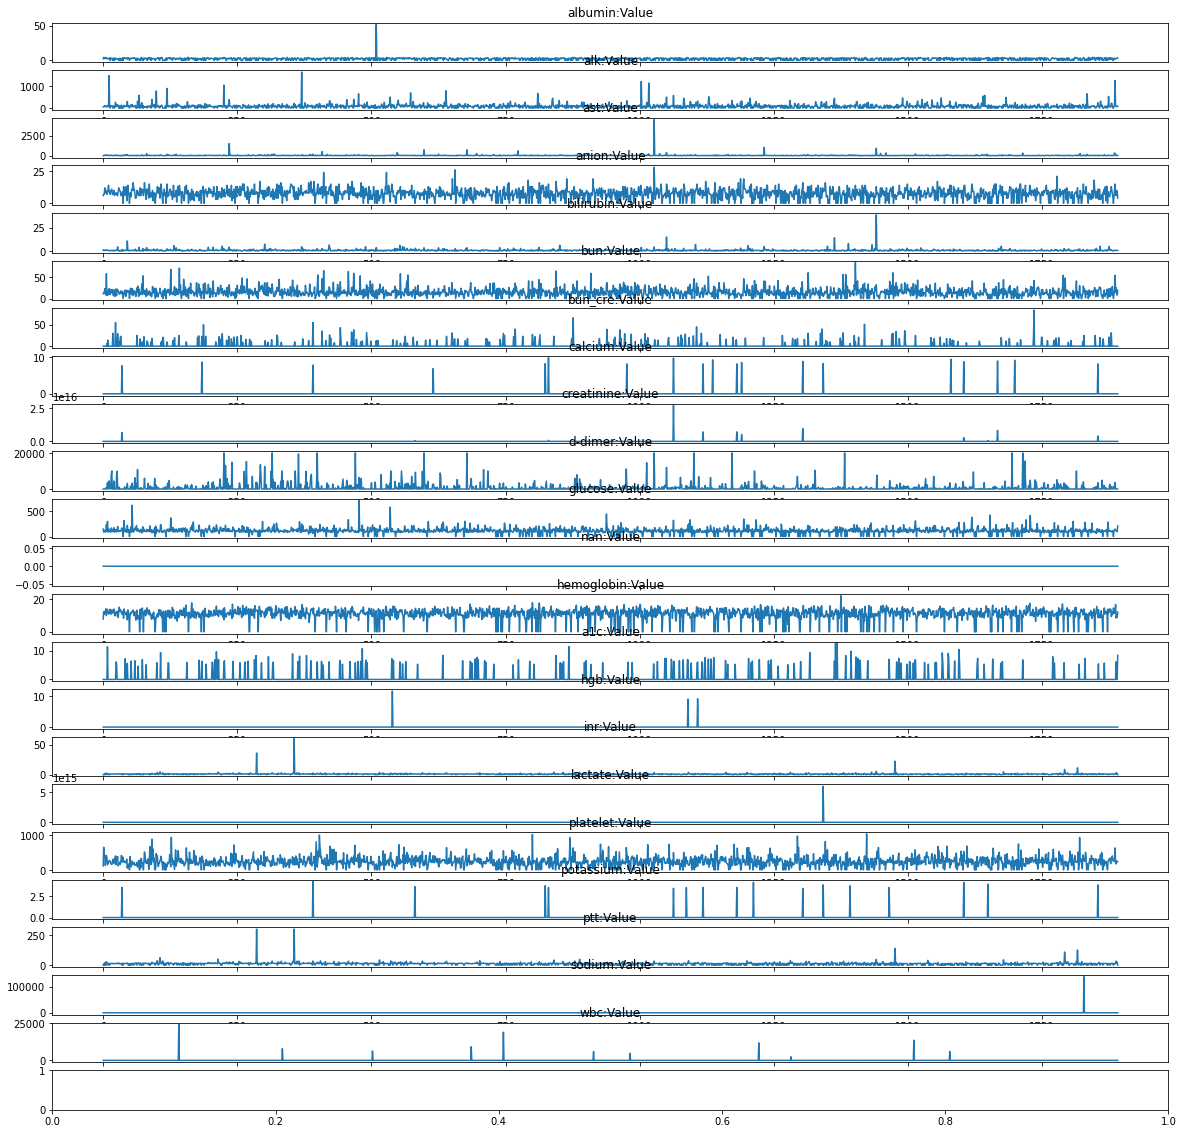

In [169]:
fig, axs = plt.subplots(23,1,figsize=(20,20));
for i in range(23,45):
    axs[i-23].plot(olab_data.iloc[:,i])
    #print(lab_data.columns[i])
    #axs[i-23].title(lab_data.columns[i])
    axs[i-23].title.set_text(olab_data.columns[i])

displaying and getting rid of all the columns with very few non-zero values

In [172]:
zcount=np.zeros(24)
for i in range(1,23):
    for j in range(1892):
        if(olab_data.iloc[j,i]==1):
            zcount[i]+=1
    if(zcount[i]<1000):
        print(olab_data.columns[i],zcount[i])


bun_cre:Binary 216.0
calcium:Binary 19.0
d-dimer:Binary 580.0
nan:Binary 0.0
a1c:Binary 169.0
hgb:Binary 3.0
lactate:Binary 450.0
potassium:Binary 17.0
sodium:Binary 61.0


In [171]:
lab_data=olab_data.copy(deep=True)

lab_data.pop("bun_cre:Binary")
lab_data.pop("bun_cre:Value")

lab_data.pop("calcium:Binary")
lab_data.pop("calcium:Value")

lab_data.pop("nan:Binary")
lab_data.pop("nan:Value")

lab_data.pop("a1c:Binary")
lab_data.pop("a1c:Value")

lab_data.pop("hgb:Binary")
lab_data.pop("hgb:Value")

lab_data.pop("lactate:Binary")
lab_data.pop("lactate:Value")

lab_data.pop("potassium:Binary")
lab_data.pop("potassium:Value")

lab_data.pop("sodium:Binary")
lab_data.pop("sodium:Value")
print("done")


done


In [104]:
lab_data.shape

(1892, 31)

In [105]:
lab_data.iloc[:,15:31]

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx,split
0,2.6,51.0,15.0,6.0,0.8,12.0,1.00,0.0,148.0,7.9,0.0,116.0,0.0,0.3,84,test
1,4.4,60.0,24.0,7.0,1.3,11.0,0.93,0.0,88.0,12.4,0.0,655.0,0.0,13.8,2248,test
2,2.6,75.0,22.0,7.0,0.5,14.0,1.20,0.0,123.0,10.9,1.3,356.0,15.9,6.8,2271,test
3,3.0,117.0,71.0,12.0,0.6,23.0,1.30,0.0,126.0,11.7,0.0,426.0,0.0,10.0,1691,test
4,3.2,64.0,28.0,8.0,0.5,12.0,0.70,0.0,91.0,12.7,2.0,131.0,21.7,4.0,3286,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,2.0,86.0,67.0,7.0,0.6,15.0,0.92,0.0,121.0,16.8,1.2,193.0,13.8,5.8,1832,val
1888,2.2,68.0,11.0,6.0,0.5,25.0,1.20,0.0,124.0,8.5,3.3,172.0,33.3,6.4,2487,val
1889,3.1,74.0,76.0,10.0,0.6,13.0,0.80,0.0,110.0,9.5,1.1,256.0,14.5,15.0,1000,val
1890,3.7,96.0,34.0,9.0,0.5,8.0,0.80,0.0,96.0,9.0,2.3,248.0,24.5,5.6,2003,val


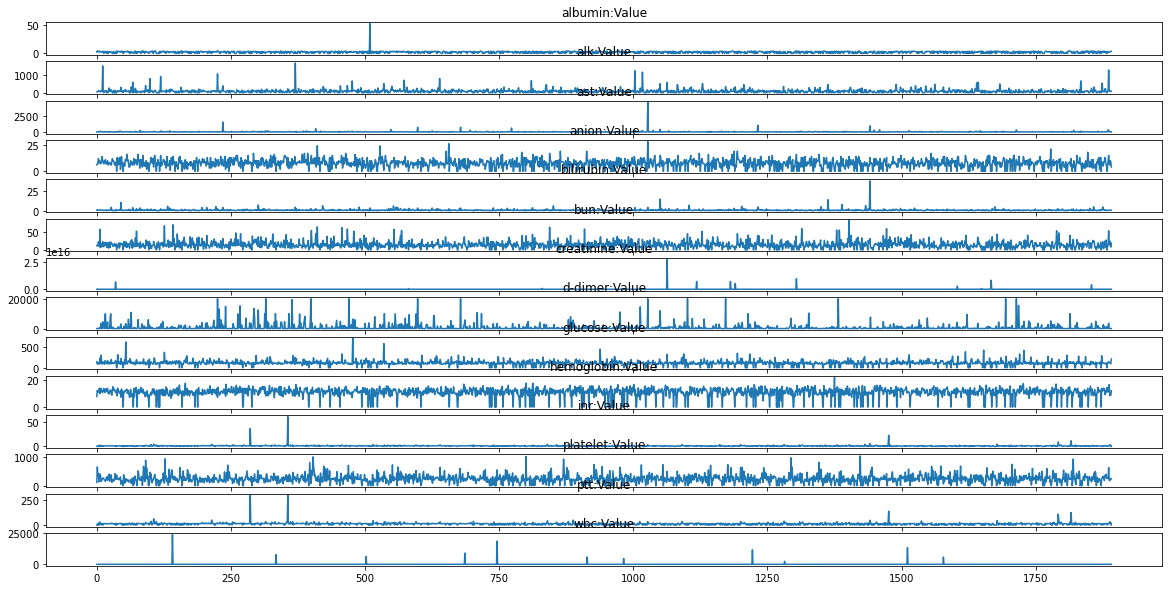

In [175]:
fig, axs = plt.subplots(14,1,figsize=(20,10))
for i in range(15,29):
    axs[i-15].plot(lab_data.iloc[:,i])
    #print(lab_data.columns[i])
    #axs[i-23].title(lab_data.columns[i])
    axs[i-15].title.set_text(lab_data.columns[i])

In [38]:
lab_data.iloc[:,15:].describe()

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx
count,1892.000000,1892.00000,1892.000000,1892.000000,1892.000000,1892.000000,1.892000e+03,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,2.276163,87.60518,35.647992,7.536469,0.692548,14.719345,4.260042e+13,818.299683,116.049683,10.935518,1.060772,241.947674,11.979387,67.523732,1581.755285
std,1.844037,111.33905,123.317460,3.832870,1.282998,9.928192,7.565985e+14,2387.966865,57.829923,3.557856,1.832387,142.132292,13.168487,898.268722,1024.379050
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.00000,0.000000,5.000000,0.000000,9.000000,7.000000e-01,0.000000,93.000000,9.800000,0.000000,161.000000,0.000000,5.900000,726.750000
50%,2.700000,75.00000,23.000000,8.000000,0.500000,13.000000,9.000000e-01,0.000000,110.000000,11.500000,1.100000,231.000000,13.400000,8.500000,1480.500000
75%,3.400000,109.00000,39.000000,10.000000,0.800000,19.000000,1.100000e+00,587.000000,137.000000,13.100000,1.200000,307.000000,15.100000,11.600000,2274.750000
max,51.900000,1647.00000,4548.000000,28.000000,38.700000,84.000000,2.700000e+16,20000.000000,711.000000,22.200000,60.000000,1038.000000,300.000000,24100.000000,3957.000000


In [176]:
fig = make_subplots(rows=14, cols=1)
for i in range(15,29):
    tempx=np.arange(1892)
    temp = np.zeros(1892)
    temp=np.sort(lab_data.iloc[:,i])
    fig.append_trace(
        go.Scatter(x=tempx,y=temp,name=lab_data.columns[i]),
        row=i-14,
        col=1
    )
fig.update_layout(height=1000, width=800, title_text="column values")
fig.show()


list of columns which need outlier management
- albumin(10)
- alk(10)
- ast(100)
- bilirubin(10)
- creatine(10^16)
- d-dimer(10)
- inr(10)
- wbc(1000)

good 
- bun
- anion
- platelet
- glucose
- hemoglobin
- ptt

In [122]:
def remove_outliers(name,thresh):
    for i in range(1892):
        #print(lab_data.loc[i,name]
        temp=lab_data[name].describe()[6]
        if(lab_data.loc[i,name]>thresh):
            lab_data.loc[i,name]=temp*2.5


In [123]:
#remove_outliers("albumin:Value",20,10)
#remove_outliers("alk:Value",200,10)
#remove_outliers("ast:Value",70,100)
#remove_outliers("bilirubin:Value",10,100)
#remove_outliers("bilirubin:Value",4,10)
remove_outliers("creatinine:Value",100)
#remove_outliers("creatinine:Value",11.2,10)
#remove_outliers("d-dimer:Value",10000,10)
#remove_outliers("inr:Value",12,10)
#remove_outliers("wbc:Value",105,1000)
#remove_outliers("wbc:Value",25,10)

In [131]:
fig = make_subplots(rows=14, cols=1)
for i in range(15,29):
    tempx=np.arange(1892)
    temp = np.zeros(1892)
    temp=np.sort(lab_data.iloc[:,i])
    fig.append_trace(
        go.Scatter(x=tempx,y=temp,name=lab_data.columns[i]),
        row=i-14,
        col=1
    )
fig.update_layout(height=1000, width=800, title_text="column values")
fig.show()

In [125]:
lab_data.iloc[:,15:].describe()

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx
count,1892.000000,1892.00000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,2.276163,87.60518,35.647992,7.536469,0.692548,14.719345,1.955359,818.299683,116.049683,10.935518,1.060772,241.947674,11.979387,67.523732,1581.755285
std,1.844037,111.33905,123.317460,3.832870,1.282998,9.928192,8.834873,2387.966865,57.829923,3.557856,1.832387,142.132292,13.168487,898.268722,1024.379050
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.00000,0.000000,5.000000,0.000000,9.000000,0.700000,0.000000,93.000000,9.800000,0.000000,161.000000,0.000000,5.900000,726.750000
50%,2.700000,75.00000,23.000000,8.000000,0.500000,13.000000,0.900000,0.000000,110.000000,11.500000,1.100000,231.000000,13.400000,8.500000,1480.500000
75%,3.400000,109.00000,39.000000,10.000000,0.800000,19.000000,1.100000,587.000000,137.000000,13.100000,1.200000,307.000000,15.100000,11.600000,2274.750000
max,51.900000,1647.00000,4548.000000,28.000000,38.700000,84.000000,97.000000,20000.000000,711.000000,22.200000,60.000000,1038.000000,300.000000,24100.000000,3957.000000


In [126]:
lab_data.shape

(1892, 31)

GETTING THE AVERAGE AND REPLACING THE ZER0S WITH THE AVERAGE

In [127]:
modlab_data=d = lab_data.copy(deep=True)
arr_avg=np.zeros(15)
for i in range(15,30):
    avg=0
    counter=0
    for j in range(lab_data.shape[0]-1):
        if(lab_data.iloc[j,i-15]==0):
            continue
        counter+=1
        avg+=lab_data.iloc[j,i]
        
    avg/=counter
    arr_avg[i-15]=avg
    
    for j in range(lab_data.shape[0]-1):
        if(lab_data.iloc[j,i]!=0):
            continue
        modlab_data.iloc[j,i]=avg
    
    #print(avg)
print(arr_avg)

[2.27523810e+00 1.16723554e+02 4.74851695e+01 8.11220889e+00
 7.52595156e-01 1.61898017e+01 2.00717728e+00 8.66859068e+02
 1.16191379e+02 1.15467927e+01 1.12962040e+00 2.59179632e+02
 1.27664018e+01 8.84921764e+01 1.57772279e+03]


In [128]:
modlab_data.iloc[:,15:].describe()

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,2.844972,116.909455,47.544382,8.226779,0.883083,15.985777,2.072056,1418.961542,124.954413,11.704490,1.345565,259.619013,15.251958,73.463745,1582.589177
std,1.334483,99.107868,121.582007,3.067005,1.220321,8.954139,8.821513,2208.801064,47.247102,2.030627,1.730275,126.158708,11.227041,898.095045,1023.732714
min,1.000000,15.000000,7.000000,1.000000,0.100000,1.000000,0.200000,0.000000,1.000000,4.600000,0.000000,2.000000,0.000000,0.100000,1.000000
25%,2.275238,75.750000,23.000000,6.000000,0.500000,10.000000,0.730000,866.859068,98.000000,10.300000,1.100000,185.000000,12.766402,6.600000,727.750000
50%,2.700000,109.500000,39.000000,8.000000,0.752595,15.000000,0.900000,866.859068,116.000000,11.546793,1.129620,247.000000,13.400000,9.300000,1483.000000
75%,3.400000,116.723554,47.485169,10.000000,0.800000,19.000000,1.200000,866.859068,137.000000,13.100000,1.200000,307.000000,15.100000,12.900000,2274.750000
max,51.900000,1647.000000,4548.000000,28.000000,38.700000,84.000000,97.000000,20000.000000,711.000000,22.200000,60.000000,1038.000000,300.000000,24100.000000,3957.000000


In [129]:
modlab_data.head()

,Unnamed: 0,albumin:Binary,alk:Binary,ast:Binary,anion:Binary,bilirubin:Binary,bun:Binary,creatinine:Binary,d-dimer:Binary,glucose:Binary,...,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx,split
0,0,1,1,1,1,1,1,1,0,1,...,1.00,866.859068,148.0,7.9,1.12962,116.0,12.766402,0.3,84.0,test
1,1,1,1,1,1,1,1,1,0,1,...,0.93,866.859068,88.0,12.4,1.12962,655.0,12.766402,13.8,2248.0,test
2,2,1,1,1,1,1,1,1,0,1,...,1.20,866.859068,123.0,10.9,1.30000,356.0,15.900000,6.8,2271.0,test
3,3,1,1,1,1,1,1,1,0,1,...,1.30,866.859068,126.0,11.7,1.12962,426.0,12.766402,10.0,1691.0,test
4,4,1,1,1,1,1,1,1,0,1,...,0.70,866.859068,91.0,12.7,2.00000,131.0,21.700000,4.0,3286.0,test


In [132]:
fig = make_subplots(rows=14, cols=1)
for i in range(15,29):
    tempx=np.arange(1892)
    temp = np.zeros(1892)
    temp=np.sort(modlab_data.iloc[:,i])
    fig.append_trace(
        go.Scatter(x=tempx,y=temp,name=modlab_data.columns[i]),
        row=i-14,
        col=1
    )
fig.update_layout(height=1000, width=800, title_text="column values")
fig.show()

In [133]:
modlab_data=modlab_data.iloc[:,15:]

In [134]:
modlab_data.head()

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx,split
0,2.6,51.0,15.0,6.0,0.8,12.0,1.00,866.859068,148.0,7.9,1.12962,116.0,12.766402,0.3,84.0,test
1,4.4,60.0,24.0,7.0,1.3,11.0,0.93,866.859068,88.0,12.4,1.12962,655.0,12.766402,13.8,2248.0,test
2,2.6,75.0,22.0,7.0,0.5,14.0,1.20,866.859068,123.0,10.9,1.30000,356.0,15.900000,6.8,2271.0,test
3,3.0,117.0,71.0,12.0,0.6,23.0,1.30,866.859068,126.0,11.7,1.12962,426.0,12.766402,10.0,1691.0,test
4,3.2,64.0,28.0,8.0,0.5,12.0,0.70,866.859068,91.0,12.7,2.00000,131.0,21.700000,4.0,3286.0,test


In [135]:
modlab_data=modlab_data.sort_values(by=["idx"])
modlab_data.reset_index(drop=True)

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value,idx,split
0,3.900000,48.000000,37.000000,9.000000,1.500000,17.000000,0.800000,866.859068,108.000000,10.700000,1.30000,224.000000,15.700000,6.200000,1.0,test
1,3.900000,48.000000,54.000000,2.000000,1.500000,18.000000,1.000000,866.859068,241.000000,9.700000,1.30000,91.000000,15.600000,10.200000,2.0,train
2,2.275238,116.723554,47.485169,9.000000,0.752595,14.000000,1.190000,866.859068,138.000000,11.546793,1.12962,259.179632,12.766402,88.492176,3.0,train
3,2.275238,116.723554,47.485169,8.112209,0.752595,16.189802,2.007177,866.859068,116.191379,11.546793,1.12962,259.179632,12.766402,88.492176,4.0,train
4,1.900000,451.000000,43.000000,7.000000,14.200000,9.000000,0.700000,866.859068,108.000000,10.300000,1.30000,178.000000,15.400000,7.100000,6.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,3.200000,74.000000,22.000000,8.000000,1.100000,26.000000,1.200000,866.859068,88.000000,12.500000,1.10000,334.000000,13.300000,13.100000,3939.0,train
1888,3.500000,74.000000,28.000000,8.000000,0.500000,21.000000,0.900000,866.859068,123.000000,13.300000,1.10000,199.000000,13.600000,6.400000,3940.0,train
1889,3.600000,72.000000,76.000000,8.000000,0.500000,22.000000,1.100000,492.000000,152.000000,13.300000,1.12962,197.000000,12.766402,6.300000,3943.0,train
1890,1.500000,138.000000,17.000000,5.000000,0.500000,10.000000,1.300000,866.859068,116.000000,8.600000,1.50000,69.000000,17.700000,6.400000,3951.0,train


In [136]:
answer_data=answer_data.sort_values(by=["idx"])
answer_data.reset_index(drop=True)

,Unnamed: 0,idx,label,pe_type,split
0,1521,0,0,NaN,test
1,963,1,1,central,test
2,878,2,0,NaN,train
3,302,3,1,segmental,train
4,122,4,0,NaN,train
...,...,...,...,...,...
1832,1690,3939,0,NaN,train
1833,1266,3940,0,NaN,train
1834,677,3943,0,NaN,train
1835,1761,3951,0,NaN,train


OBTAINING THE TRAIN,VALIDATE,OR TEST DATA

In [218]:
def split(section):
    height=0
    width=23
    #fin=pd.DataFrame()
    finx=modlab_data.copy(deep=True)
    finy=answer_data.copy(deep=True)
    labpoint=0
    anspoint=0
    while(labpoint<finx.shape[0] and anspoint<finy.shape[0]):
        while(modlab_data['idx'].iloc[labpoint]>answer_data['idx'].iloc[anspoint] and anspoint<finy.shape[0]-1):
            anspoint+=1
        while(modlab_data['idx'].iloc[labpoint]<answer_data['idx'].iloc[anspoint] and labpoint<finx.shape[0]-1):
            labpoint+=1
        if(modlab_data['idx'].iloc[labpoint]==answer_data['idx'].iloc[anspoint]):
            #fin.append(modlab_data.iloc[labpoint])
            #fin=pd.concat([fin,modlab_data.iloc[labpoint]])
            finx.iloc[height] = modlab_data.iloc[labpoint]
            finy.iloc[height] = answer_data.iloc[anspoint]
            height+=1
            #print(modlab_data.iloc[labpoint])
            #print(answer_data.iloc[anspoint])
            anspoint+=1
            labpoint+=1
    finx=finx[0:height]
    finy=finy[0:height]
    
    finx=finx[finx["split"].str.contains(section)]
    finy=finy[finy["split"].str.contains(section)]
    
    finx=finx.sort_values(by=["idx"])
    finx=finx.reset_index(drop=True)
    
    finy=finy.sort_values(by=["idx"])
    finy=finy.reset_index(drop=True)
    return finx.loc[:,:"wbc:Value"], finy.loc[:,"label":"label"]

In [219]:
x_train, y_train=split("train")
y_train

,label
0,0
1,1
2,0
3,0
4,1
...,...
1449,0
1450,0
1451,0
1452,0


In [220]:
x_train

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value
0,3.900000,48.000000,54.000000,2.000000,1.500000,18.000000,1.000000,866.859068,241.000000,9.700000,1.30000,91.000000,15.600000,10.200000
1,2.275238,116.723554,47.485169,9.000000,0.752595,14.000000,1.190000,866.859068,138.000000,11.546793,1.12962,259.179632,12.766402,88.492176
2,2.275238,116.723554,47.485169,8.112209,0.752595,16.189802,2.007177,866.859068,116.191379,11.546793,1.12962,259.179632,12.766402,88.492176
3,1.900000,451.000000,43.000000,7.000000,14.200000,9.000000,0.700000,866.859068,108.000000,10.300000,1.30000,178.000000,15.400000,7.100000
4,2.275238,116.723554,47.485169,6.000000,0.752595,12.000000,1.200000,1000.000000,94.000000,16.000000,0.90000,276.000000,10.900000,5.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,3.200000,74.000000,22.000000,8.000000,1.100000,26.000000,1.200000,866.859068,88.000000,12.500000,1.10000,334.000000,13.300000,13.100000
1450,3.500000,74.000000,28.000000,8.000000,0.500000,21.000000,0.900000,866.859068,123.000000,13.300000,1.10000,199.000000,13.600000,6.400000
1451,3.600000,72.000000,76.000000,8.000000,0.500000,22.000000,1.100000,492.000000,152.000000,13.300000,1.12962,197.000000,12.766402,6.300000
1452,1.500000,138.000000,17.000000,5.000000,0.500000,10.000000,1.300000,866.859068,116.000000,8.600000,1.50000,69.000000,17.700000,6.400000


SEEING HOW UNBALANCED IT IS

In [222]:
neg=0
for i in range(1454):
    if((y_train["label"].iloc[i]<0.5)):
        neg+=1
neg

946

In [223]:
count=0
block=np.zeros(438)
for i in range(1,1454):
    if(count>=438):
        break
    if(y_train["label"].iloc[i]==0):
        block[count]=i
        count+=1
        #y_train=y_train.drop([i])
        #x_train=x_train.drop([i]) 
#y_train=y_train.drop(block)
#x_train=x_train.drop(block) 

In [225]:
pos=0
for i in range(1454):
    if((y_train["label"].iloc[i]>0.5)):
        pos+=1
pos

508

In [149]:
y_train.reset_index(drop=True)

,label
0,0
1,1
2,1
3,1
4,1
...,...
1011,0
1012,0
1013,0
1014,0


In [150]:
x_train.reset_index(drop=True)

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value
0,0.596196,-0.727112,0.023580,-1.973299,0.751066,0.232610,-0.084154,-0.284688,2.431747,-1.026641,-0.034290,-1.350917,0.009048,-0.076249
1,-0.365058,0.003619,-0.017369,0.235647,-0.138011,-0.207506,-0.050531,-0.284688,0.278829,-0.108803,-0.112278,0.003932,-0.202398,0.025986
2,-0.365058,0.003619,-0.017369,-0.711044,-0.138011,-0.427564,-0.048761,-0.233343,-0.640864,2.104399,-0.217382,0.139436,-0.341671,-0.082909
3,-0.764548,-0.652681,-0.020418,-1.657735,0.394200,-1.197766,-0.137244,-0.284688,-0.557256,-0.430252,0.011483,-1.278413,0.038897,-0.079253
4,0.537033,-0.291163,-0.032989,1.813465,-0.081621,0.122581,-0.101851,-0.284688,-0.097409,-1.175738,-0.171609,0.002485,-0.326747,-0.072071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.182056,-0.450656,-0.177555,-0.079917,0.275245,1.112841,-0.048761,-0.284688,-0.766277,0.364932,-0.125836,0.606682,-0.162580,-0.072462
1012,0.359545,-0.450656,-0.139842,-0.079917,-0.438486,0.562696,-0.101851,-0.284688,-0.034703,0.762525,-0.125836,-0.480873,-0.140194,-0.081211
1013,0.418708,-0.471922,0.161859,-0.079917,-0.438486,0.672725,-0.066458,-0.429250,0.571458,0.762525,-0.112278,-0.496985,-0.202398,-0.081342
1014,-0.823711,0.229849,-0.208982,-1.026608,-0.438486,-0.647621,-0.031065,-0.284688,-0.181018,-1.573330,0.057256,-1.528148,0.165753,-0.081211


Z-SCORE NORMALIZATION

In [151]:
def normalize(xval):
    avg=xval.describe()
    avg=avg.iloc[1,:]
    sigma=xval.std()
    for i in range(xval.shape[1]):
        #print(avg[i])
        #print(sigma[i])
        xval.iloc[:,i:i+1]-=avg[i]
        xval.iloc[:,i:i+1]/=sigma[i]
    return xval

In [228]:
x_train=normalize(x_train)

In [153]:
#def checkAlignment(xval,yval):
#    for i in range(xval.shape[0]):
#        if(xval.loc[i,"idx"]!=yval.loc[i,"idx"]):
#            return False
#   return True

VALIDATION DATA

In [210]:
val_x, val_y=split("val")
#val_x=val_x.loc[:,:"wbc:Value"]
val_y=val_y.loc[:,"label"]
#val_x=np.array(val_x)
val_x=val_x.astype('float32')
val_x=normalize(val_x)
#val_x

In [292]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [ ]:
total=1892
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

AUTOMATIC HYPERPARAMETER TUNER

In [317]:
def model_builder(hp):
    model=Sequential()
    
    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=100)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4,1e-5,1e-1])
    hp_kregval = hp.Float("kreg_val",min_value=0, max_value=1, step=0.0002)
    #hp_bregval = hp.Float("breg_val",min_value=0, max_value=1, step=0.0002)
    hp_drop = hp.Float("drop_val",min_value=0,max_value=0.99,step=0.001)

    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L2(hp_kregval)))
    Dropout(hp_drop)
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L2(hp_kregval)))
    Dropout(hp_drop)
    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L2(hp_kregval)))
    Dropout(hp_drop)
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation,kernel_regularizer=tf.keras.regularizers.L2(hp_kregval)))
    Dropout(hp_drop)
    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    return model

In [318]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x26')

In [319]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [320]:
tuner.search(x_train, y_train, epochs=50, validation_data=(val_x,val_y), callbacks=[stop_early])

In [301]:
x_train

,albumin:Value,alk:Value,ast:Value,anion:Value,bilirubin:Value,bun:Value,creatinine:Value,d-dimer:Value,glucose:Value,hemoglobin:Value,inr:Value,platelet:Value,ptt:Value,wbc:Value
0,0.710225,-0.743174,0.040197,-2.015251,0.459498,0.222038,-0.102493,-0.251353,2.531721,-1.024520,-0.031130,-1.343623,0.025043,-0.079410
1,-0.396483,0.006520,-0.007741,0.236030,-0.109054,-0.227049,-0.076481,-0.251353,0.291600,-0.120244,-0.119378,0.001292,-0.211945,0.017604
2,-0.396483,0.006520,-0.007741,-0.049494,-0.109054,0.018804,0.035399,-0.251353,-0.182710,-0.120244,-0.119378,0.001292,-0.211945,0.017604
3,-0.652077,3.653088,-0.040744,-0.407193,10.120394,-0.788407,-0.143567,-0.251353,-0.360862,-0.730732,-0.031130,-0.647893,0.008316,-0.083251
4,-0.396483,0.006520,-0.007741,-0.728805,-0.109054,-0.451592,-0.075111,-0.191752,-0.665345,2.060256,-0.238310,0.135803,-0.368042,-0.085730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,0.406172,-0.243612,0.104936,-0.079341,-0.142144,-0.091677,-0.106714,-0.357101,-0.419993,1.919990,-0.174905,-0.339862,-0.168118,-0.080873
1888,0.053166,-0.598167,-0.190960,-0.350317,-0.274297,-0.214052,-0.143734,-0.251353,-0.571846,-0.025230,-0.101244,-0.088701,-0.207710,-0.083323
1889,-0.193135,-0.468248,-0.204997,-0.085582,-0.238018,-0.676136,-0.149253,-0.251353,-0.377263,-0.531126,-0.035093,-0.347332,-0.004894,-0.081208
1890,0.027621,0.623308,0.215671,0.780711,1.203037,1.312750,-0.118981,8.313669,-0.470801,0.312308,0.307196,-1.393848,0.531735,-0.045563


In [298]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.get("tuner/epochs")

10

In [296]:
model = tuner.hypermodel.build(best_hps)
#model.load_weights(initial_weights)

history = model.fit(x_train, y_train, epochs=10, validation_data=(val_x,val_y))

Epoch 1/10
60/60 [==============================] - 1s 6ms/step - loss: 0.6821 - accuracy: 0.5719 - val_loss: 0.7035 - val_accuracy: 0.5596
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.6078 - val_loss: 0.6713 - val_accuracy: 0.6269
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.6427 - val_loss: 0.6654 - val_accuracy: 0.6062
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6570 - val_loss: 0.7235 - val_accuracy: 0.5803
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.5947 - accuracy: 0.6776 - val_loss: 0.7521 - val_accuracy: 0.5440
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.5972 - accuracy: 0.6834 - val_loss: 0.7655 - val_accuracy: 0.5803
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7030 - val_loss: 0.7166 - val_accuracy: 0.6010
Epoch 8/10
60/60 [==

In [271]:
modelFNN=Sequential([
    Dense(units=480, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.00),bias_regularizer=tf.keras.regularizers.L2(0)),
    #Dropout(0.05),
    Dense(units=256, activation="tanh",kernel_regularizer=tf.keras.regularizers.L2(0.00),bias_regularizer=tf.keras.regularizers.L2(0)),
    #Dropout(0.05),
    Dense(units=256, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.00),bias_regularizer=tf.keras.regularizers.L2(0)),
    #Dropout(0.05),
    Dense(units=256, activation="tanh",kernel_regularizer=tf.keras.regularizers.L2(0.00),bias_regularizer=tf.keras.regularizers.L2(0)),
    Dense(units=1, activation="sigmoid")
])

In [286]:
modelFNN.compile(
    loss=BinaryCrossentropy(),
    optimizer="Adam",
    metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy")]
)

#history=modelFNN.fit(x_train,y_train,epochs=10,validation_split=0.2)
history=modelFNN.fit(val_x,val_y,epochs=50,validation_data=(val_x,val_y))

Epoch 1/50
5/5 [==============================] - 1s 59ms/step - loss: 0.0470 - accuracy: 0.9740 - val_loss: 0.2170 - val_accuracy: 0.9231
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.1299 - accuracy: 0.9675 - val_loss: 0.2768 - val_accuracy: 0.9231
Epoch 3/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0835 - accuracy: 0.9740 - val_loss: 0.6877 - val_accuracy: 0.7949
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0861 - accuracy: 0.9675 - val_loss: 0.6883 - val_accuracy: 0.7949
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.9870 - val_loss: 0.3883 - val_accuracy: 0.8462
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.7014 - val_accuracy: 0.8462
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.8558 - val_accuracy: 0.7949
Epoch 8/50
5/5 [===========

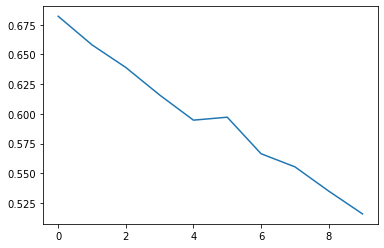

In [304]:
plt.plot(history.history["loss"])

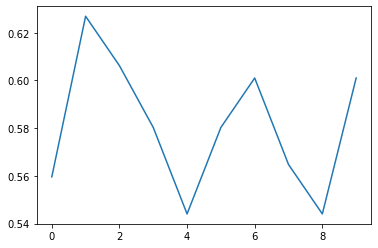

In [305]:
plt.plot(history.history["val_accuracy"])

In [289]:
a = model.predict(val_x)

7/7 [==============================] - 0s 2ms/step


In [306]:
results=model.evaluate(val_x,val_y)
results

7/7 [==============================] - 0s 2ms/step - loss: 0.8027 - accuracy: 0.6010


[0.8027213215827942, 0.6010362505912781]

In [259]:
lans=0
hans=0
ans=0
for i in range(193):
    if((a[i]<0.5)and(val_y[i]<0.5)):
        ans+=1
        lans+=1
    elif((a[i]>0.5)and(val_y[i]>0.5)):
        ans+=1
        hans+=1
print(ans)
print(lans)
print(hans)

104
50
54


In [189]:
ans=0
for i in range(193):
    if((a[i]<0.5)):
        ans+=1
ans

93

In [190]:
ans=0
for i in range(193):
    if((val_y[i]<0.5)):
        ans+=1
ans

85

In [1112]:
y_train.shape

(1016, 1)